# SMILING FACES DETECTOR

## 1) Problem Statement

- The dataset contains a series of images that can be used to solve the Happy House problem! 
- We need to build an artificial neural network that can detect smiling faces.
- Only smiling people will be allowed to enter the house!
- The train set has 600 examples. The test set has 150 examples.
- Data Source: https://www.kaggle.com/iarunava/happy-house-dataset


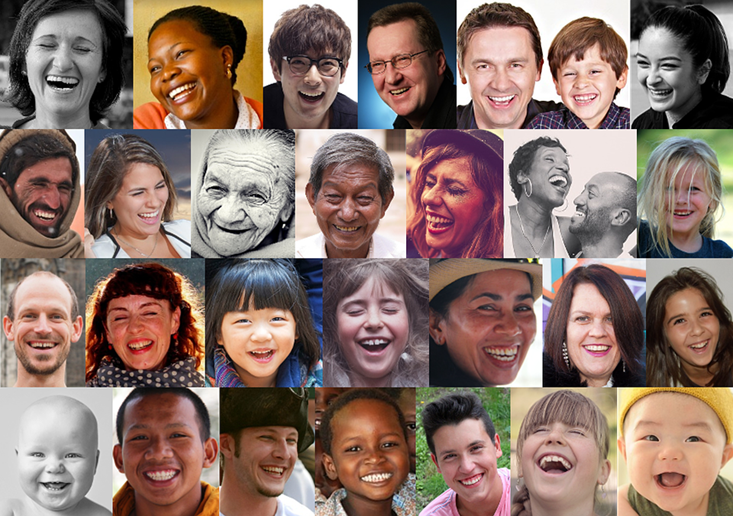

## 2) Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
import random 

In [2]:
filename = 'train_happy.h5'
f = h5py.File(filename, 'r')

In [3]:
for key in f.keys():
    print(key)

list_classes
train_set_x
train_set_y


In [4]:
happy_training = h5py.File('train_happy.h5', 'r')
happy_testing = h5py.File('test_happy.h5', 'r')

In [5]:
X_train = np.array(happy_training['train_set_x'][:])
y_train = np.array(happy_training['train_set_y'][:])
X_test = np.array(happy_testing['test_set_x'][:])
y_test = np.array(happy_testing['test_set_y'][:])

In [6]:
X_train.shape

(600, 64, 64, 3)

In [7]:
y_train.shape

(600,)

## 3) Visualize Data

Smile or not ? 0


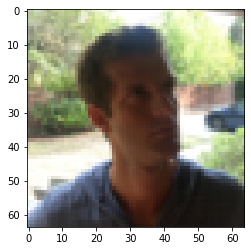

In [8]:
# test pour une image choisie aléatoirement
i = random.randint(1, 600)
plt.imshow(X_train[i])
print(f'Smile or not ? {y_train[i]}')

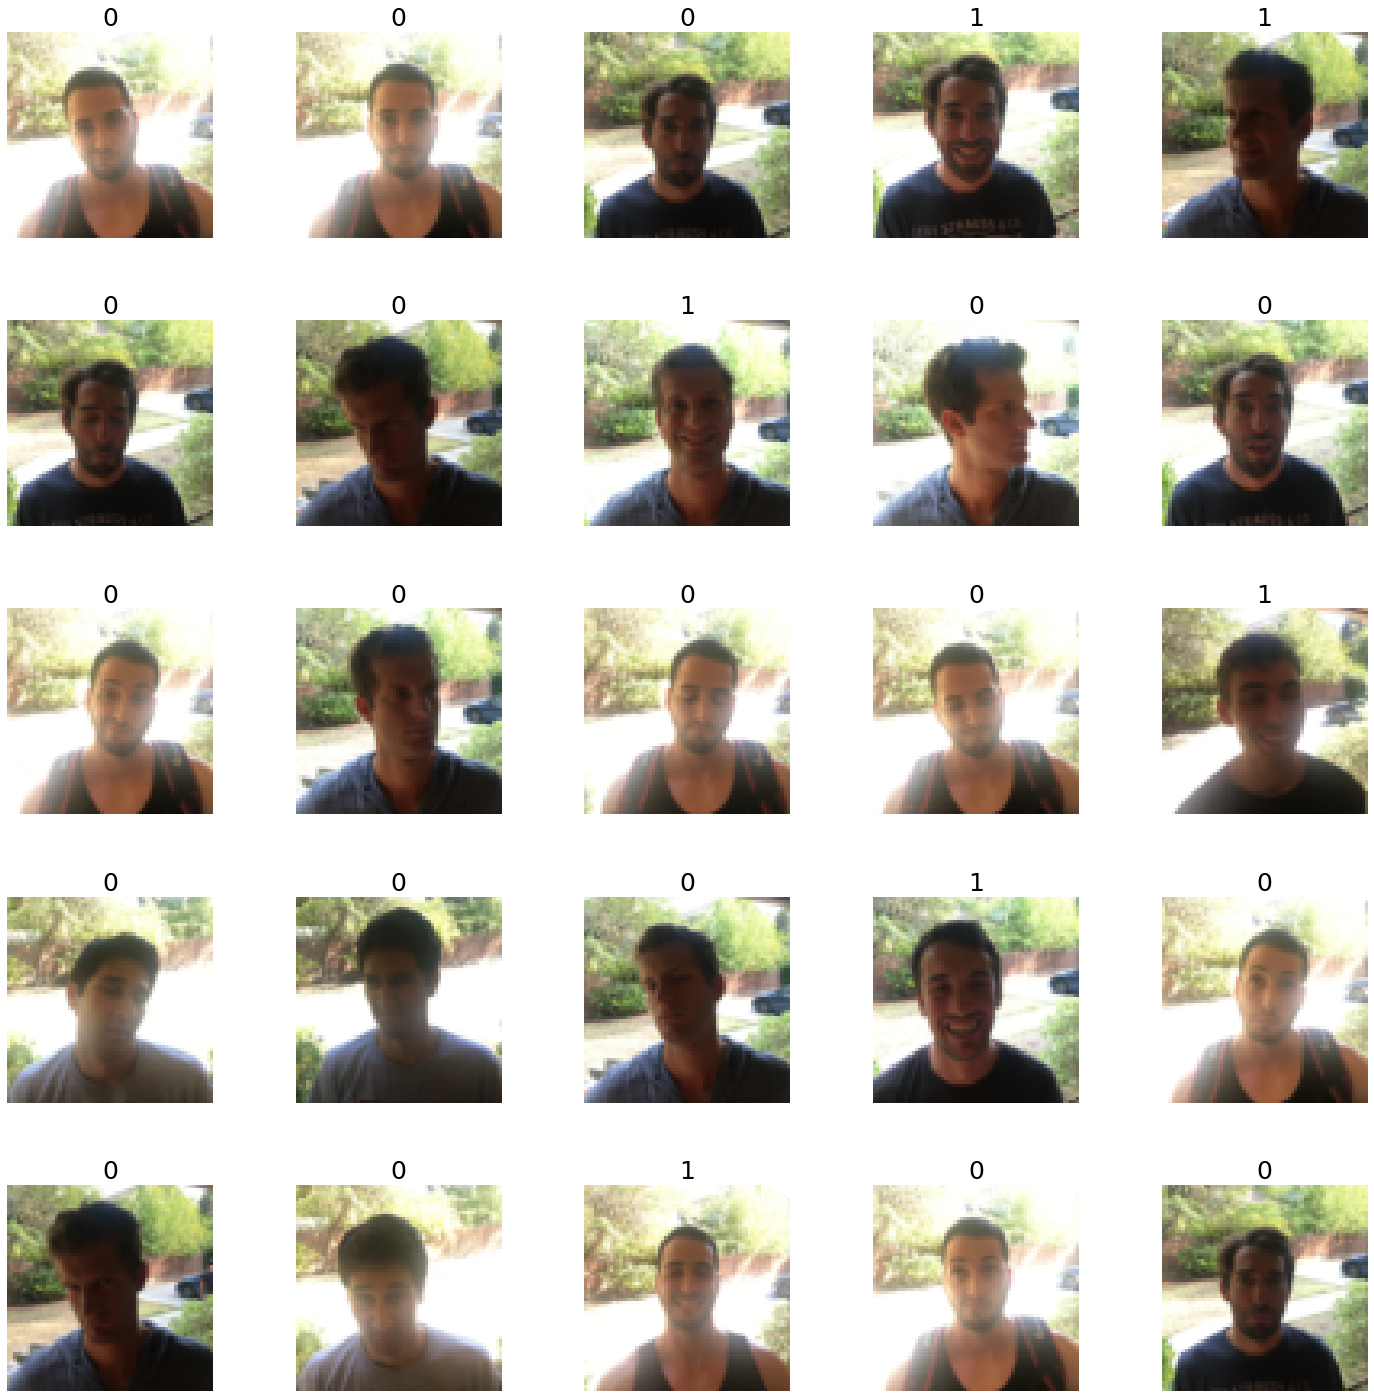

In [9]:
# visualisation de 25 images et de leurs labels
W_grid = 5
L_grid = 5

fig, axes = plt.subplots(L_grid, W_grid, figsize=(25,25))

axes = axes.ravel()
n_training = len(X_train)

for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index], fontsize = 25)
    axes[i].axis('off')

plt.subplots_adjust(hspace = 0.4)

## 4) Training Model

In [10]:
X_train = X_train/255
X_test = X_test/255

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [12]:
# construction du réseau de neurones convolutionnel
cnn_model = Sequential()

cnn_model.add(Conv2D(64, 6, 6, input_shape = (64, 64, 3), activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.2))

cnn_model.add(Conv2D(64, 6, 6, activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Flatten())
cnn_model.add(Dense(output_dim = 128, activation = 'relu'))

cnn_model.add(Dense(output_dim = 1, activation = 'sigmoid'))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (6, 6), input_shape=(64, 64, 3..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (6, 6), activation="relu")`
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  del sys.path[0]


In [13]:
# choix de la fonction de perte à optimiser et de la métrique d'étude
cnn_model.compile(loss = 'binary_crossentropy', optimizer = Adam(lr = 0.001), metrics = ['accuracy']) 

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [14]:
# entraînement du réseau de neurones sur 20 étapes
epochs = 20
history = cnn_model.fit(X_train, y_train, batch_size = 30, nb_epoch = epochs, verbose = 1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  



Epoch 1/20
600/600 [==============================] - 9s 15ms/step - loss: 0.7283 - accuracy: 0.5167
Epoch 2/20
600/600 [==============================] - 6s 9ms/step - loss: 0.6652 - accuracy: 0.5900
Epoch 3/20
600/600 [==============================] - 6s 9ms/step - loss: 0.5623 - accuracy: 0.7017
Epoch 4/20
600/600 [==============================] - 6s 9ms/step - loss: 0.4235 - accuracy: 0.8000
Epoch 5/20
600/600 [==============================] - 6s 9ms/step - loss: 0.2999 - accuracy: 0.8833
Epoch 6/20
600/600 [==============================] - 6s 9ms/step - loss: 0.3040 - accuracy: 0.8833
Epoch 7/20
600/600 [==============================] - 6s 9ms/step - loss: 0.2364 - accuracy: 0.9083
Epoch 8/20
600/600 [==============================] - 6s 9ms/step - loss: 0.2019 - accuracy: 0.9167
Epoch 9/20
600/600 [==============================] - 6s 9ms/step - loss: 0.1689 - accuracy: 0.9300
Epoch 10/20
600/600 [==============================] - 6s 9ms/step - loss: 0.1689 - accuracy: 0.92

## 5) Testing and Evaluating Model

In [15]:
eval = cnn_model.evaluate(X_test, y_test)
eval

150/150 [==============================] - 0s 3ms/step


[0.22448128700256348, 0.9133333563804626]

In [16]:
print(f'Test Accuracy : {eval[1]}')

Test Accuracy : 0.9133333563804626


In [17]:
predicted_class = cnn_model.predict_classes(X_test)

In [18]:
predicted_class.shape

(150, 1)

In [19]:
y_test.shape

(150,)

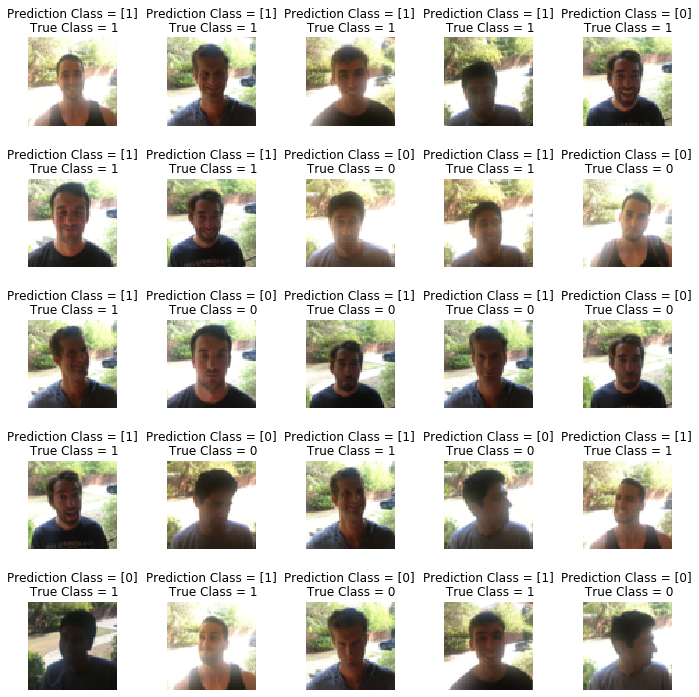

In [20]:
# comparaison entre les labels et les prédictions
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title(f'Prediction Class = {predicted_class[i]}\n True Class = {y_test[i]}')
    axes[i].axis('off')

plt.subplots_adjust(hspace = 0.6)

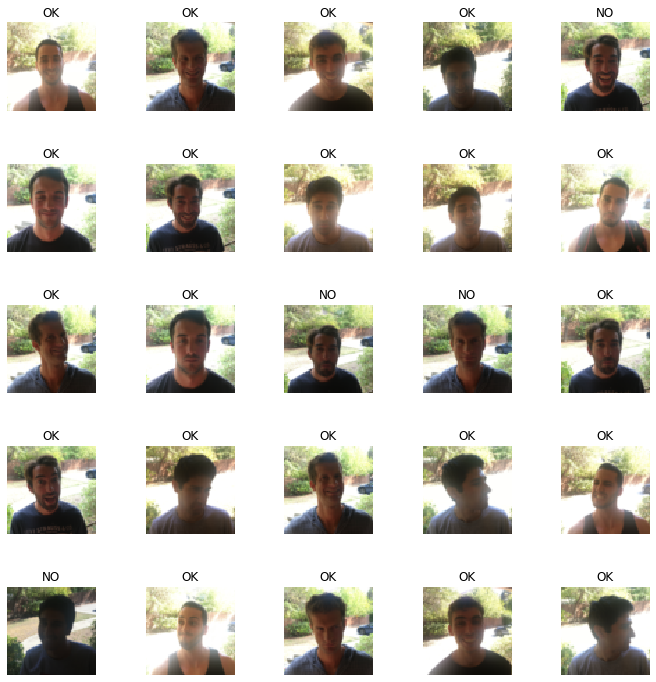

In [21]:
# implémentation d'une fonction pour valider ou infirmer la prédiction
def formated_title(y_test, predicted_class):
    """Format title in fonction of matching
    """
    if y_test[i] == predicted_class[i]:
        return "OK"
    else:
        return "NO"

L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title(formated_title(y_test, predicted_class))
    axes[i].axis('off')

plt.subplots_adjust(hspace = 0.6)

In [22]:
from sklearn.metrics import confusion_matrix

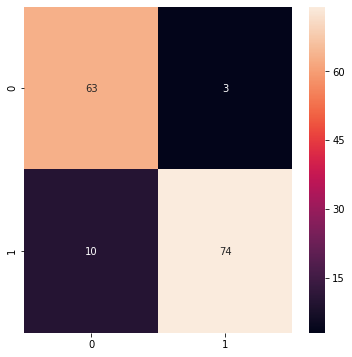

In [23]:
cm = confusion_matrix(y_test, predicted_class)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot = True)

In [24]:
from sklearn.metrics import classification_report

In [25]:
print(classification_report(y_test, predicted_class))

              precision    recall  f1-score   support

           0       0.86      0.95      0.91        66
           1       0.96      0.88      0.92        84

    accuracy                           0.91       150
   macro avg       0.91      0.92      0.91       150
weighted avg       0.92      0.91      0.91       150

